In [1]:
import PIL
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def rle_to_pixels(rle_code):
    rle_code = [int(i) for i in rle_code.split()]
    pixels = [(pixel_position % 768, pixel_position // 768)
              for start, length in list(zip(rle_code[0:-1:2], rle_code[1::2]))
              for pixel_position in range(start, start + length)]
    return pixels

In [50]:
def apply_mask(image, mask):
    for x, y in mask:
        image[x, y, [0, 1]] = 255
    return image

In [61]:
def show_image(image_number, df):
    img = load_img(df.loc[image_number, 'ImageId'])
    mask_pixels = rle_to_pixels(df.loc[image_number, 'EncodedPixels'])
    img = apply_mask(img, mask_pixels)
    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    ax.imshow(img)
    ax.hlines([128, 256, 384, 512, 640], 0, 767, color='r')
    ax.vlines([128, 256, 384, 512, 640], 0, 767, color='r')
    

In [5]:
# Считывает разметку, удаляет строки с пустыми значениями
df = pd.read_csv("D:\\diplom\\train_ship_segmentations_v2.csv", index_col=0).dropna()

In [6]:
#Упорядочивает таблицу с id картинки и разметкой по id 
#Если на картинке больше одного корабля совмещает строки с разметкой
df = df.groupby("ImageId")[['EncodedPixels']].agg(lambda rle_codes: ' '.join(rle_codes)).reset_index()

train_path = "D:\\diplom\\train_v2\\"
load_img = lambda filename: np.array(PIL.Image.open(train_path + filename))

In [7]:
df_set = pd.read_csv(f"D:\\diplom\\un_ship_segmentations.csv")


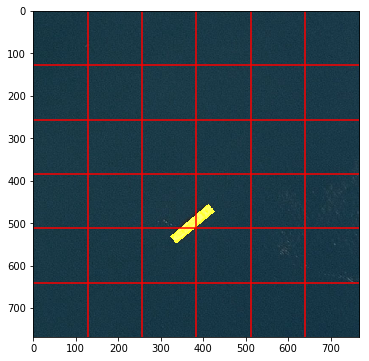

In [62]:
# image_number = df.loc[df['ImageId']=='00a52cd2a.jpg'].index[0]
image_number = df.loc[df['ImageId']=='130cae3f9.jpg'].index[0]
show_image(image_number, df)

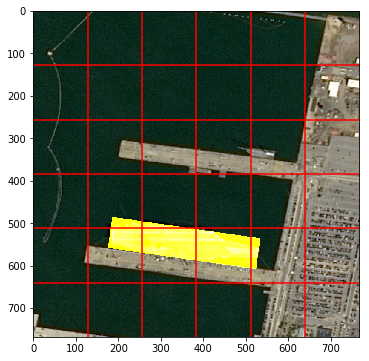

In [63]:
image_number = df.loc[df['ImageId']=='a129c36b3.jpg'].index[0]
show_image(image_number, df)